### ***Objective :***
### > Improve customer experience by analysing the diwali sales data
### > Increase Revenue

In [18]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv('https://github.com/rishabhnmishra/Python_Diwali_Sales_Analysis/raw/main/Diwali%20Sales%20Data.csv', encoding = 'unicode_escape')

# to avoid encoding error we use 'unicode_escape'

In [20]:
df.shape

(11251, 15)

In [21]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [23]:
# Drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [25]:
# Check if values are null or not
pd.isnull(df) # of no use

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# Check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [27]:
df.shape

(11251, 13)

In [28]:
# drop null values
df.dropna(inplace = True) # 'inplace = True' is used to save the changes

In [29]:
df.shape

(11239, 13)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


## df_test.dropna(inplace = true) is same as df_test = df_test.dropna()

In [31]:
# Change data type
df['Amount'] = df['Amount'].astype('int')

In [32]:
df['Amount'].dtypes

dtype('int64')

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [34]:
# Renaming a column
df.rename(columns = {'Marital_Status' : 'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [36]:
# describe() method returns description of the DataFrame (i.e. count, mean, std, etc)

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [37]:
# use describe() for specified columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# ***Exploratory Data Analysis(EDA)***

### **Gender**

In [39]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

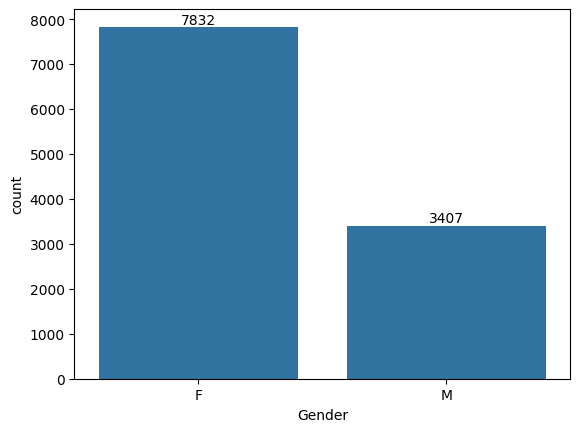

In [54]:
# defining custom color to M and F categories

ax = sns.countplot(x = 'Gender', data = df)


for bar in ax.containers: # to get the value of count
  ax.bar_label(bar)

In [55]:
# Plotting of countplot by me

# # Define custom colors for male and female categories
# colors = {'M': 'blue', 'F': 'pink'}

# # Create the countplot with custom colors
# ax = sns.countplot(x='Gender', hue='Gender', data=df, palette=colors)

# for bar in ax.containers: # to get the value of count
#   ax.bar_label(bar)

# # Add labels and title
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.title('Count of Male and Female')

# # Show the plot
# plt.show()

<Axes: xlabel='Gender', ylabel='Amount'>

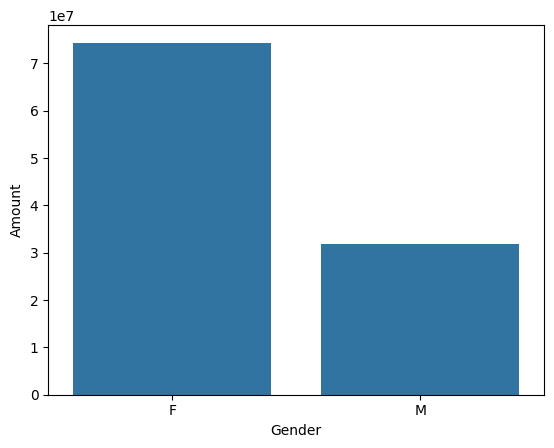

In [63]:
# Total Amount vs Gender
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

#### From the above graph we can observe that most buyers are females and even the purchasing power of females are higher than males.

### **Age**

In [64]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Age Group', ylabel='count'>

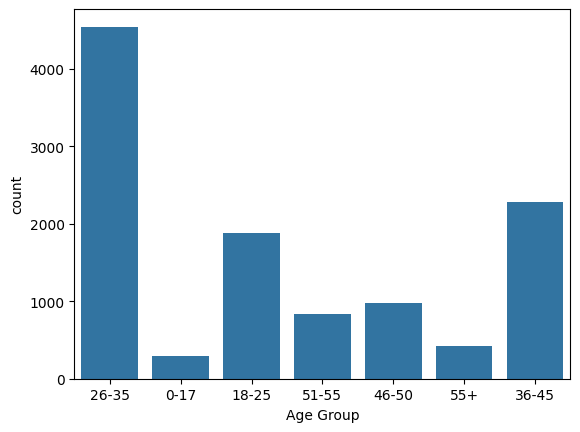

In [67]:
sns.countplot(data = df, x = 'Age Group')

<Axes: xlabel='Age Group', ylabel='count'>

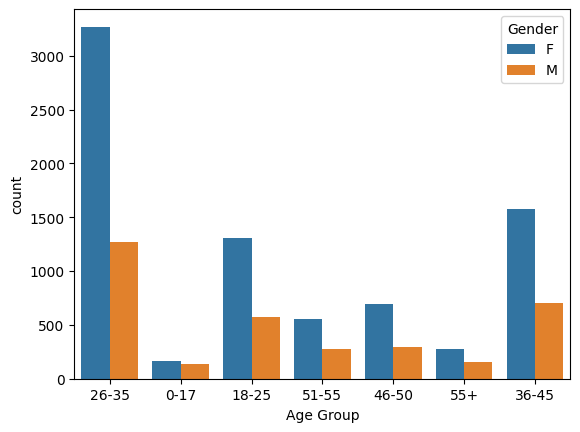

In [68]:
sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

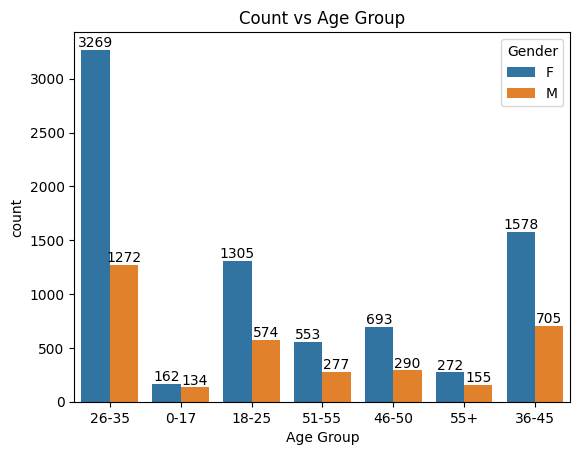

In [75]:
plt. title('Count vs Age Group')

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: title={'center': 'Amount vs Age Group'}, xlabel='Age Group', ylabel='Amount'>

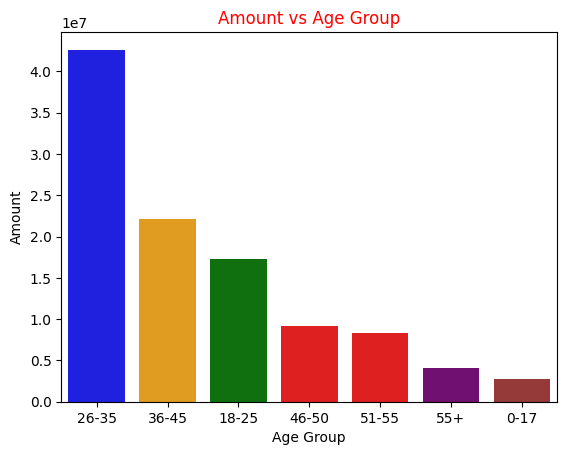

In [83]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

plt.title("Amount vs Age Group", color = 'Red')

colors = {'26-35': 'blue', '36-45' : 'orange', '18-25': 'green', '46-50' :'red', '51-55' : 'red', '55+' : 'purple' , '0-17' : 'brown' }

sns.barplot(x = 'Age Group', y = 'Amount',hue = 'Age Group', data = sales_age, palette = colors)


#### From the above graphs we can conclude thay most of the buyers are from age group 26-35yrs and also most of them are women

### **State**

In [84]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='count'>

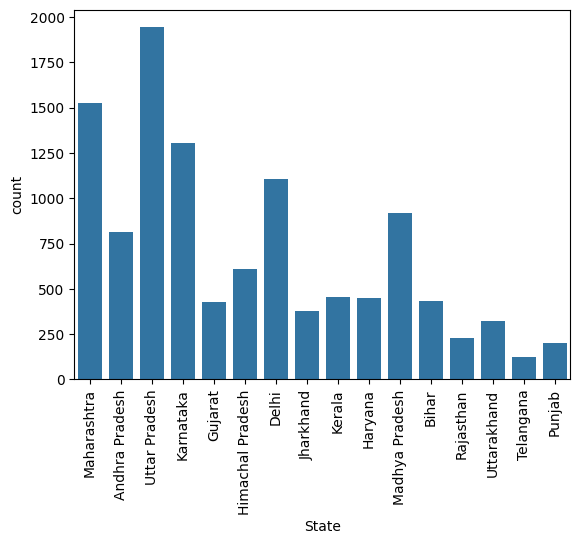

In [86]:
plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'State')

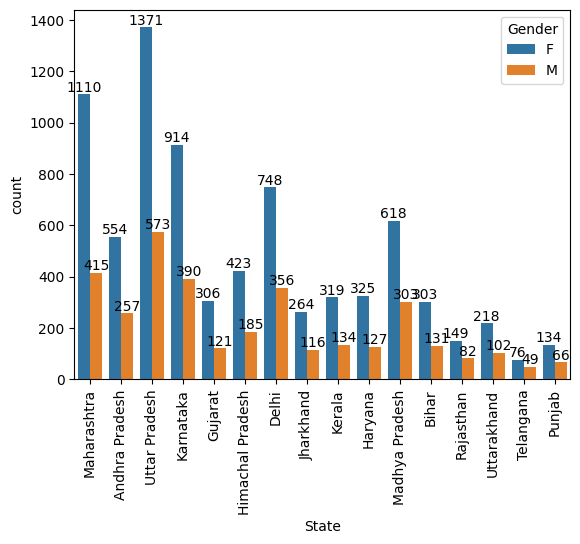

In [99]:
plt.xticks(rotation = 90)
ax = sns.countplot(data = df, x = 'State', hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

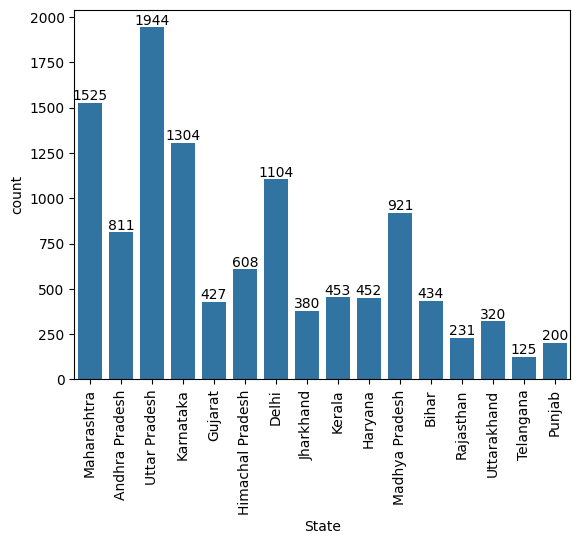

In [89]:
plt.xticks(rotation = 90)

ax = sns.countplot(data = df, x = 'State')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: title={'center': 'Number of Orders vs State'}, xlabel='State', ylabel='Orders'>

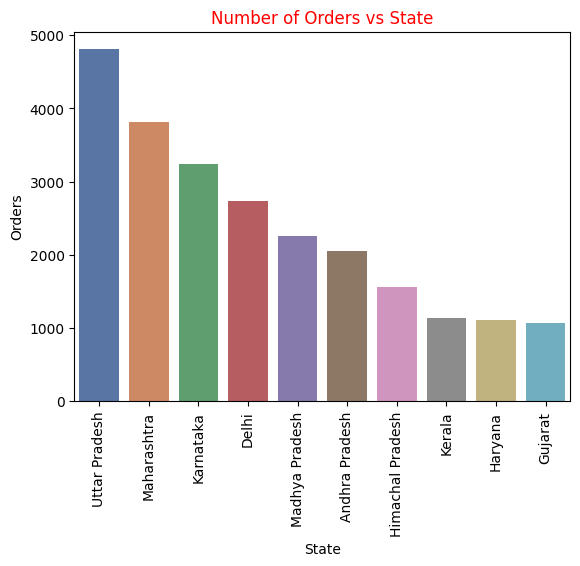

In [103]:
# # Total Amount vs State by Me

# sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

# plt.title("Number of Orders vs State", color = 'Red')

# colors = sns.color_palette("deep", 10)


# plt.xticks(rotation = 90)

# sns.barplot(x = 'State', y = 'Orders',hue = 'State', data = sales_state, palette = colors)


<Axes: xlabel='State', ylabel='Orders'>

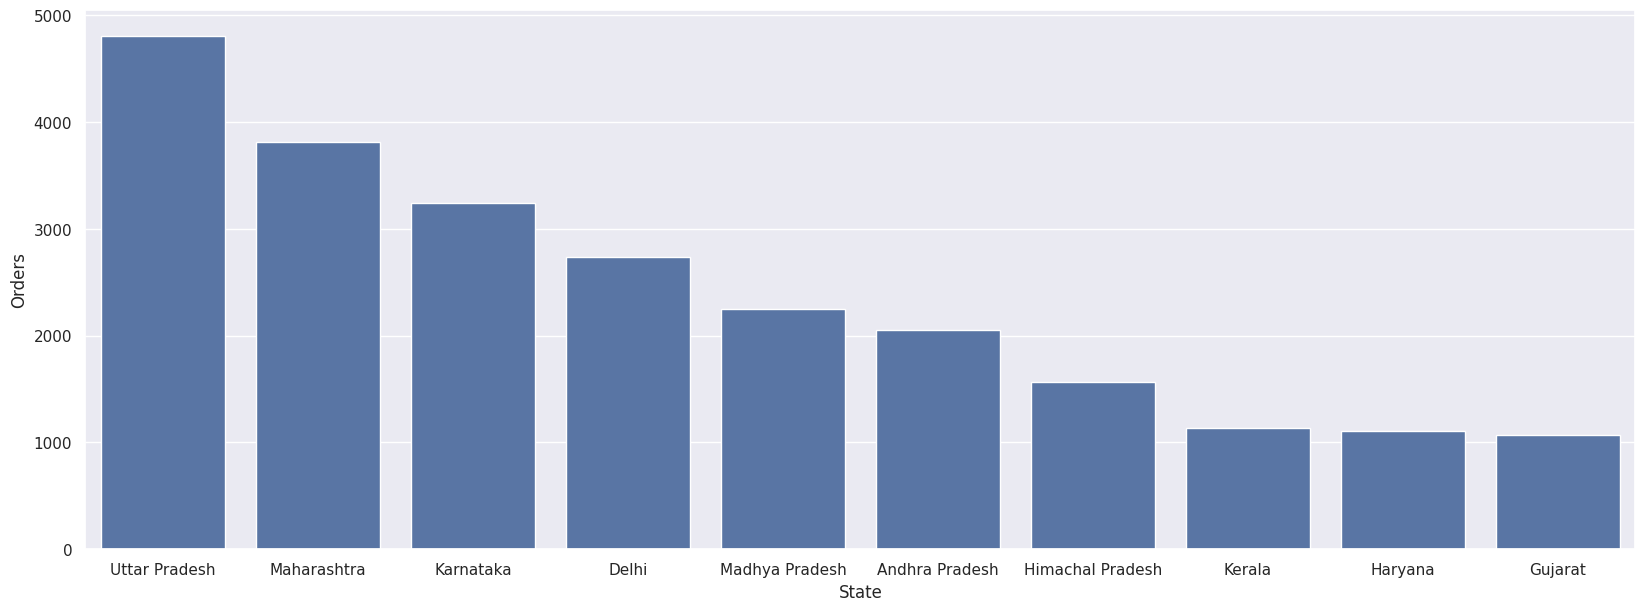

In [117]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

plt.figure(figsize=(20, 7))

sns.barplot(data = sales_state, x = 'State', y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

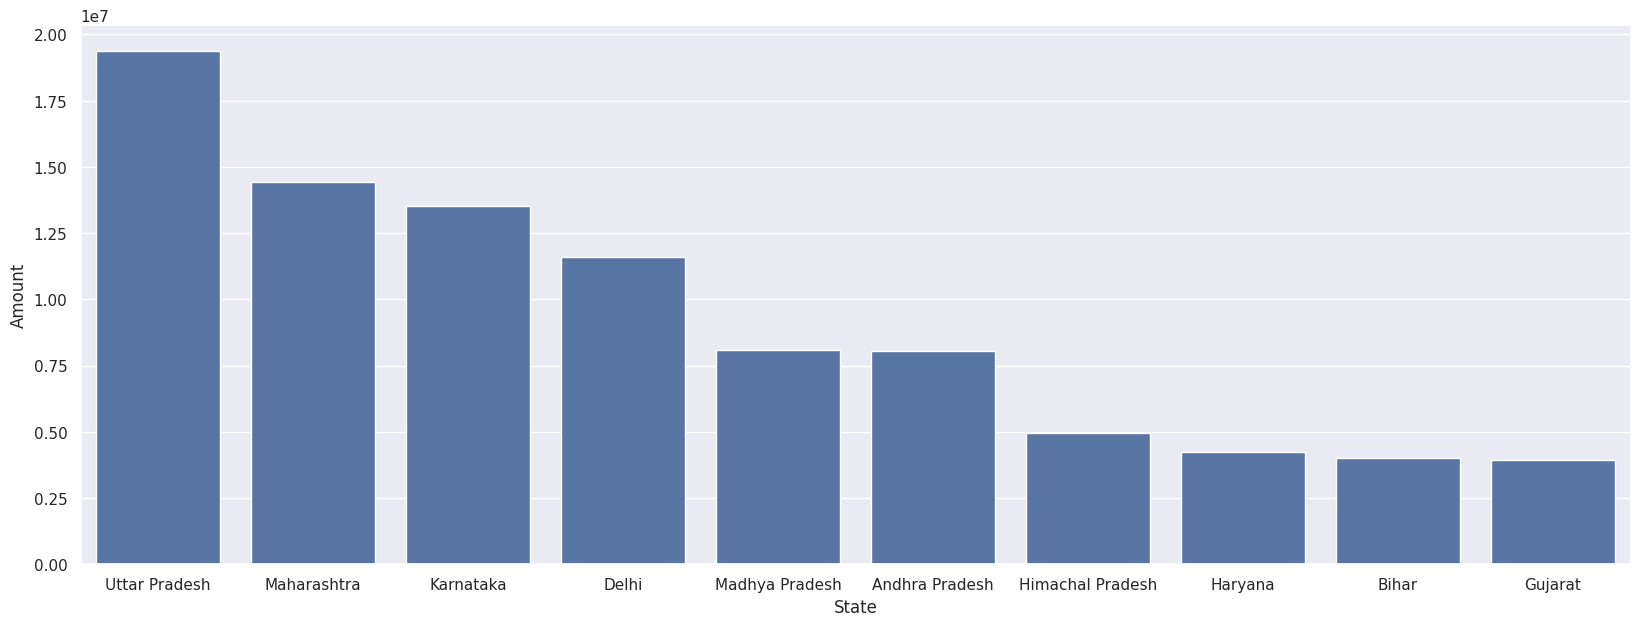

In [118]:
# Total amount/Sales from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize=(20, 7))

sns.barplot(data = sales_state, x = 'State', y = 'Amount')


#### From the above graphs we can conclude that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

### **Marital Status**

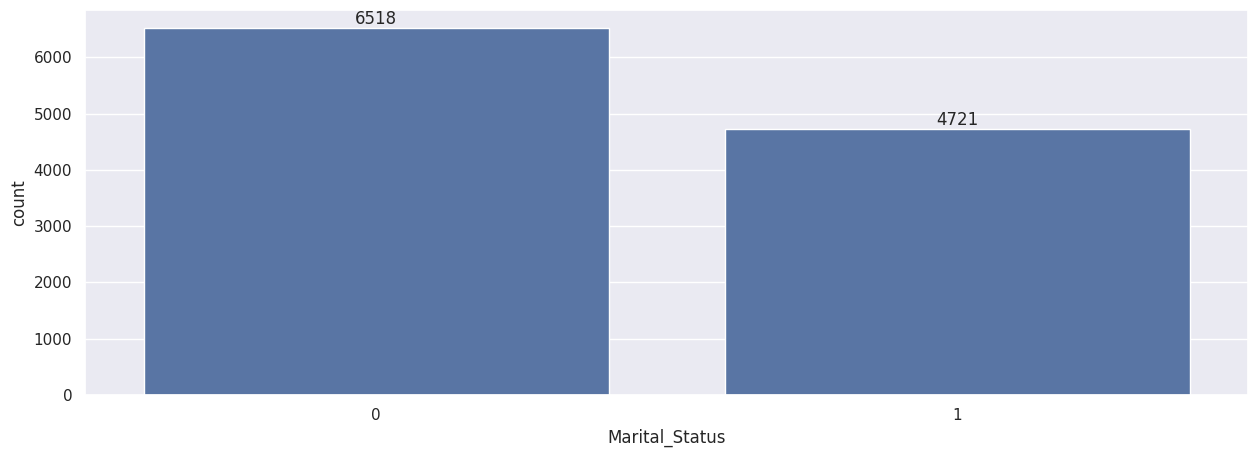

In [122]:
ax = sns.countplot(data = df, x = 'Marital_Status')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

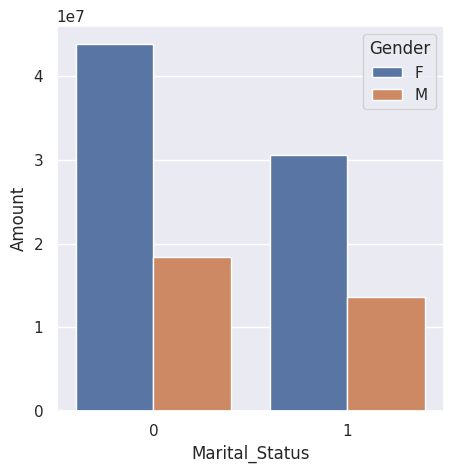

In [124]:
salesData = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize = (5,5))

sns.barplot(data = salesData, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

#### From the above graphs we can observe that most of the buyers are married(women) and they have high purchasing power

### **Occupation**

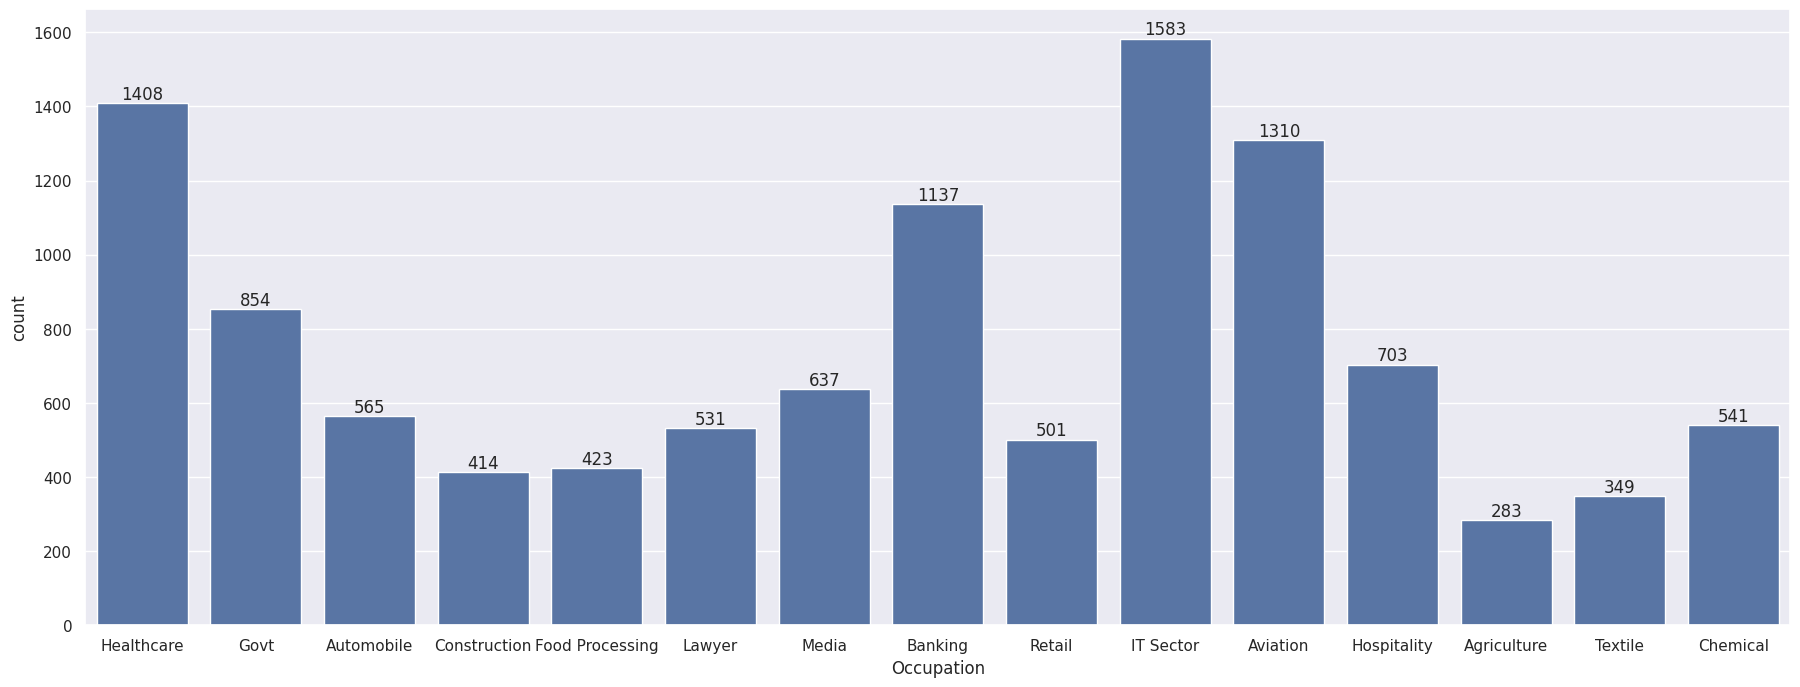

In [128]:
plt.figure(figsize = (22,8))

ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

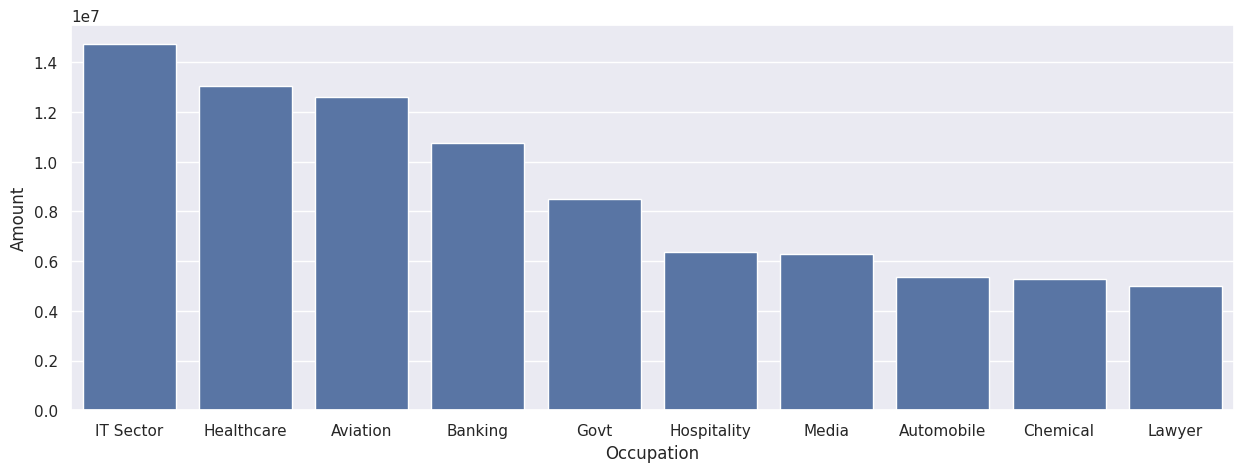

In [131]:
salesData = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize = (15,5))

sns.barplot(data = salesData, x = 'Occupation', y = 'Amount')

#### From the above graphs we can observe that most of the buyers are from IT Sector, Healthcare and  Aviation sector.

### **Product Category**

In [133]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

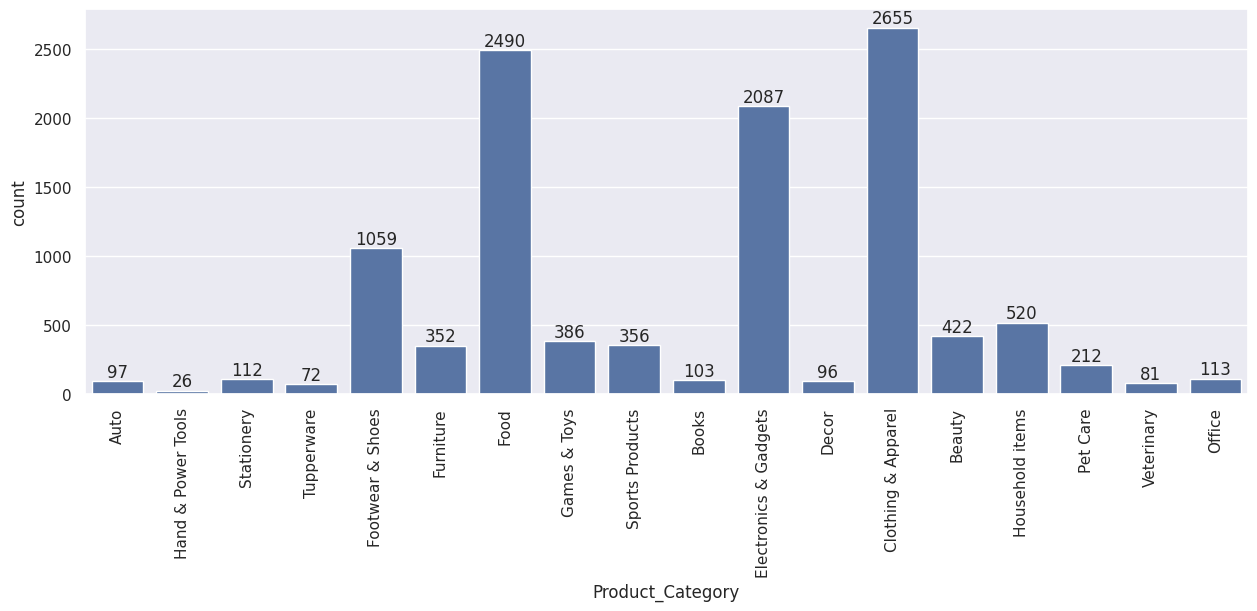

In [141]:
# plt.figure(figsize = (28,5))

plt.xticks(rotation = 90)

ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

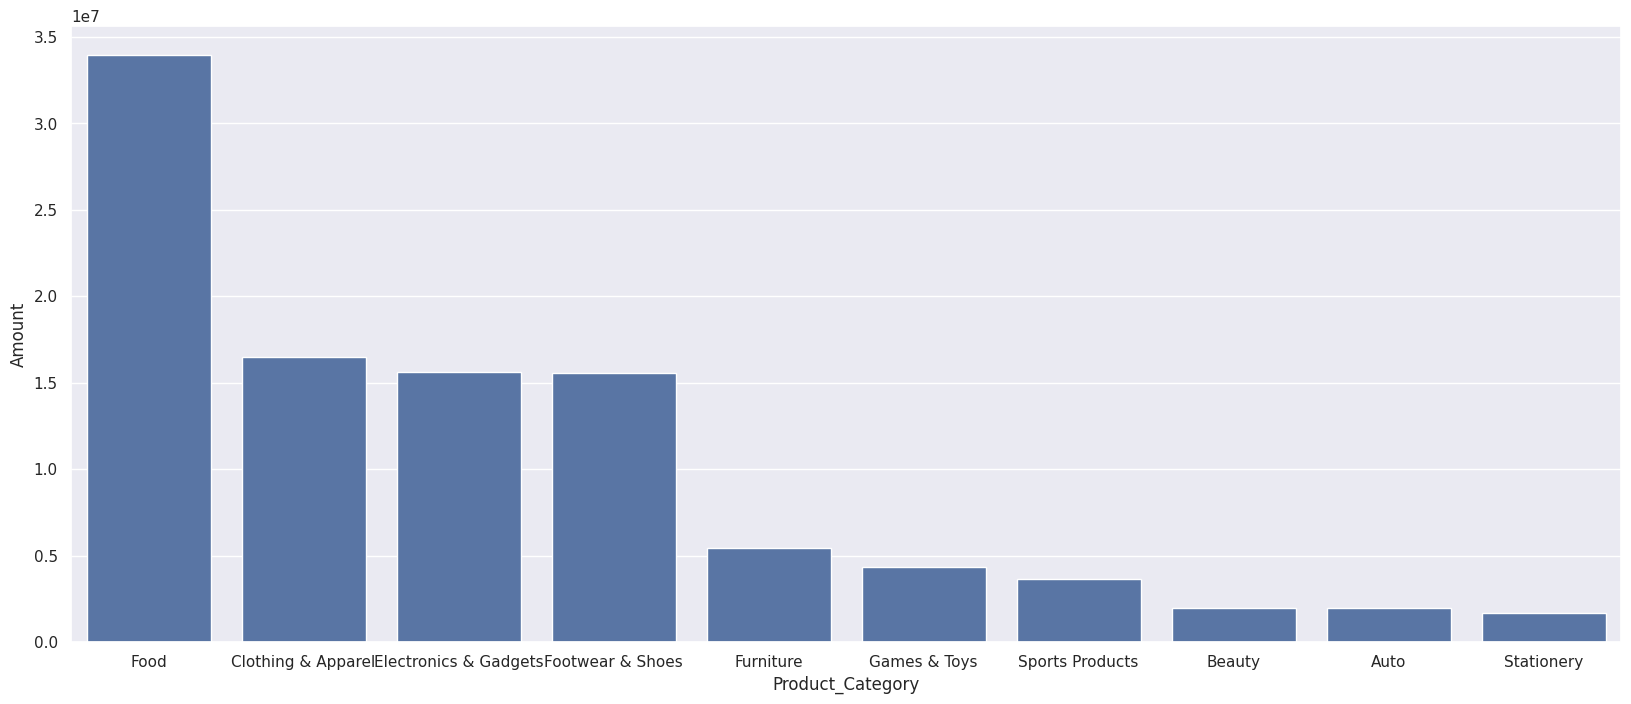

In [143]:
salesData = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize = (20,8))

sns.barplot(data = salesData, x = 'Product_Category', y = 'Amount')



#### From the above graphs we can conclude that most of the sold products are from Food, Clothing and Electronic category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

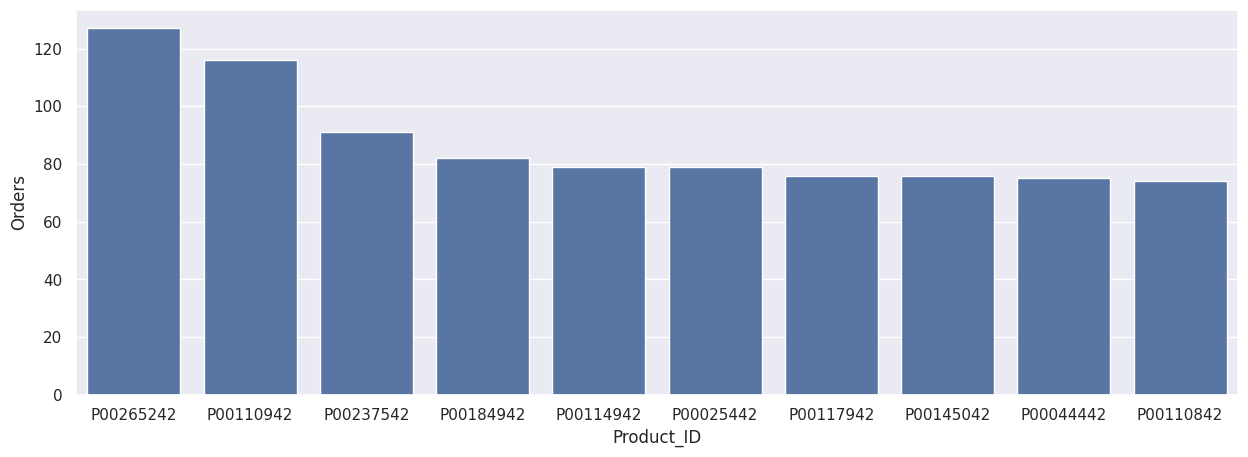

In [144]:
salesData = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

plt.figure(figsize = (15,5))

sns.barplot(data = salesData, x = 'Product_ID', y = 'Orders')

# ***Conclusion***

After carrying out the Exploratory Data Analysis on Diwali Sales Data, we can conclude that:

*Married women of age group 26-35yrs from UP, Maharashtra and Karnataka working in IT, Aviation and Healthcare Sector are more likely to buy products from Food, Clothing and Electronics categories.*